In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('/content/weather.csv')

In [3]:
X = data[["Humidity (%)", "Wind Speed (km/h)", "Rainfall (mm)"]]
y = data["Temperature (°C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
MLP = Sequential(
    [
        Dense(64, input_dim=3, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ]
)
MLP.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
history = MLP.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 401.2035 - mae: 19.9044 - val_loss: 390.3563 - val_mae: 19.6896
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 408.4348 - mae: 20.0909 - val_loss: 381.1436 - val_mae: 19.4539
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 401.7301 - mae: 19.8951 - val_loss: 371.0679 - val_mae: 19.1925
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 369.1884 - mae: 19.0655 - val_loss: 358.9539 - val_mae: 18.8724
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 361.5318 - mae: 18.8635 - val_loss: 344.0424 - val_mae: 18.4700
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 351.4934 - mae: 18.5845 - val_loss: 326.8356 - val_mae: 17.9947
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 322.6343 - mae: 17.7888 - val_loss: 306.9268 - val_mae: 17.4287
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 306.9412 - mae: 17.3246 - val_loss: 283.6854 - val_mae: 16.7440
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

In [5]:
y_pred = MLP.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [6]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

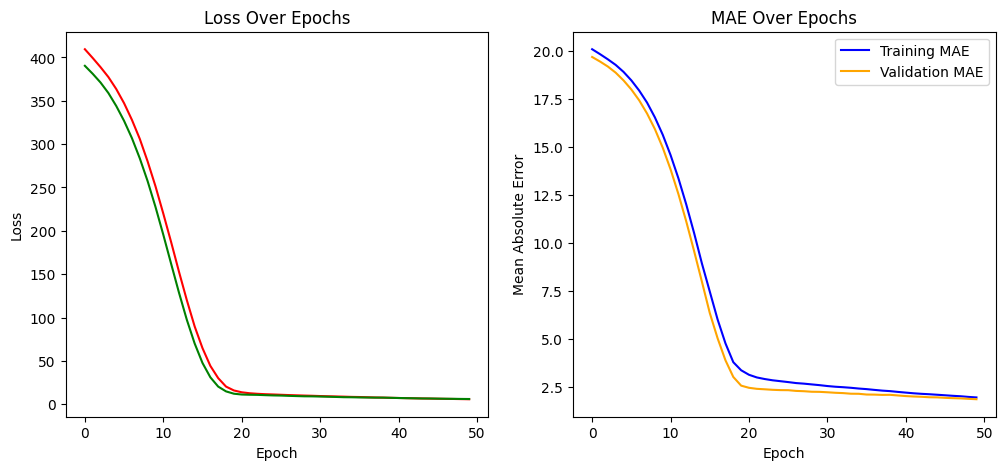

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss", color = 'red')
plt.plot(val_loss, label="Validation Loss", color = 'green')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_mae, label="Training MAE", color='blue')
plt.plot(val_mae, label="Validation MAE", color='orange')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')

plt.legend()
plt.show()